# Part 1: Data Preprocessing
We will first attempt to preprocess the data for the project. This is an important step to make sure that our data is clean before feeding it into our machine learning model.

(918, 12)
   Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0  
     Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
913   45   M            TA        110          264          0     Normal   
914   68   M           ASY        144        

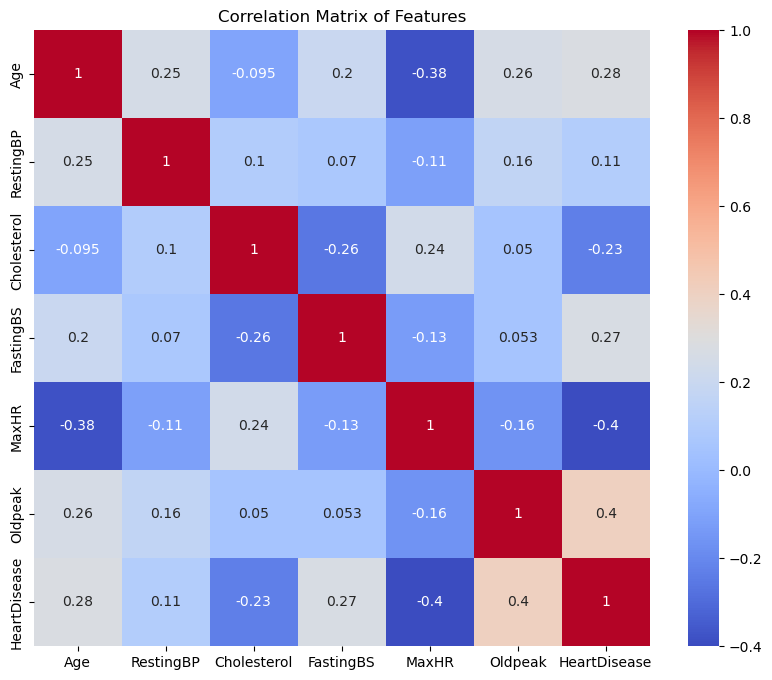

In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
import seaborn as sns

data_file_path = "heart.csv"
dataset = pd.read_csv(data_file_path)

# explore data using the following functions:
print(dataset.shape)
print(dataset.head())
print(dataset.tail())
dataset.info()

# correlation analysis
numerical_data = dataset.select_dtypes(include='number')
corr_mtx = numerical_data.corr()

plt.figure(figsize=(10,8))
sns.heatmap(corr_mtx, annot=True, cmap='coolwarm', square=True)
plt.title('Correlation Matrix of Features')
plt.show()


In [81]:
# null value checks

print(dataset.isnull().sum())
# no null values! :) So there is no need for this step.

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


              Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000  


<Figure size 500x500 with 0 Axes>

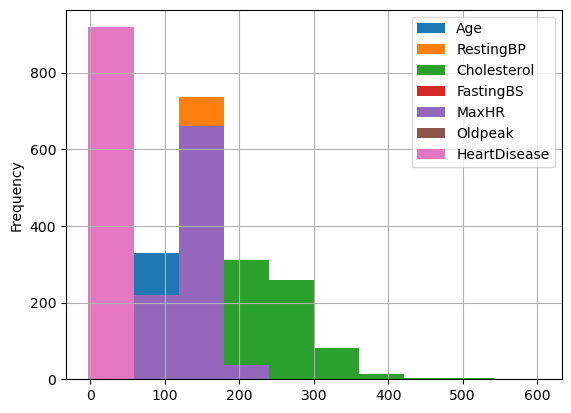

<Figure size 1000x500 with 0 Axes>

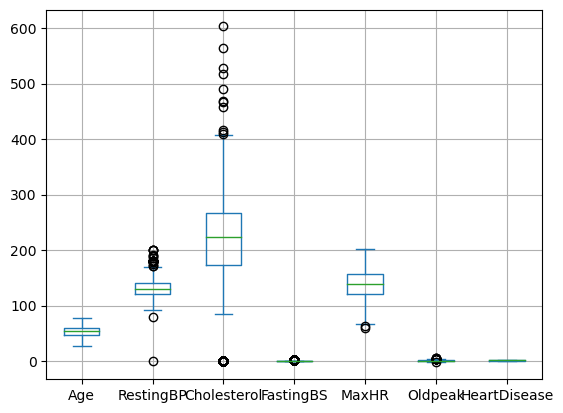

In [82]:
# summarize numerical features with describe
# investigate spread of numerical features with histograms and box plots.

print(dataset.describe())

plt.figure(figsize=(5,5))
numeric_features = dataset.select_dtypes("number").columns
dataset[numeric_features].plot.hist()
plt.grid(True)
plt.show()

plt.figure(figsize=(10,5))
dataset[numeric_features].plot.box()
plt.grid(True)
plt.show()

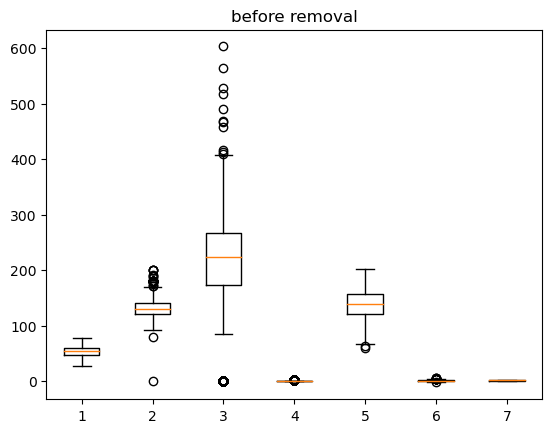

Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease'],
      dtype='object')
              Age   RestingBP  Cholesterol  FastingBS       MaxHR     Oldpeak  \
count  588.000000  588.000000   588.000000      588.0  588.000000  588.000000   
mean    51.722789  130.375850   239.064626        0.0  141.755102    0.802211   
std      9.542500   15.238699    50.738558        0.0   24.144890    0.961727   
min     28.000000   92.000000    85.000000        0.0   71.000000   -0.100000   
25%     44.750000  120.000000   205.000000        0.0  124.000000    0.000000   
50%     52.000000  130.000000   234.000000        0.0  142.000000    0.300000   
75%     58.000000  140.000000   272.000000        0.0  160.000000    1.500000   
max     77.000000  170.000000   404.000000        0.0  202.000000    3.600000   

       HeartDisease  
count    588.000000  
mean       0.426871  
std        0.495044  
min        0.000000  
25%        0.000000  
50%        0.0000

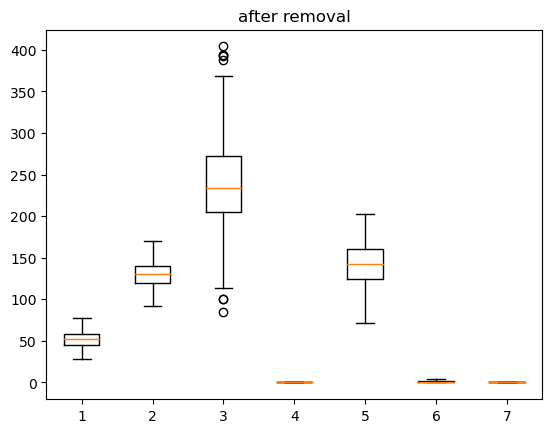

In [83]:
# outlier removal!

# get numerical dataframe:
numerical_data = dataset.select_dtypes(include='number')
plt.boxplot(numerical_data)
plt.title("before removal")
plt.show()

# get rid of outliers: IQR method
def remove_outliers(column):
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    return column[(column >= lower_bound) & (column <= upper_bound)]

# column labels to iterate through
numerical_columns = dataset.select_dtypes(include='number').columns
print(numerical_columns)

# make copy of dataframe and apply filtered numeric parts to it
dataset_filtered = dataset.copy()
for col in numerical_columns:
    dataset_filtered[col] = remove_outliers(dataset[col])

# drop na values
dataset_filtered = dataset_filtered.dropna()
print(dataset_filtered.describe())
print(dataset_filtered.head())
print(dataset_filtered.isna().sum())
print(dataset_filtered.shape)

numerical_data = dataset_filtered.select_dtypes('number')
plt.boxplot(numerical_data)
plt.title("after removal")
plt.show()

In [84]:
# data normalization: minmax scaling
from sklearn.preprocessing import MinMaxScaler

numeric_columns = dataset_filtered.select_dtypes('number').columns

minmax_scaler = MinMaxScaler()
scaled_data = minmax_scaler.fit_transform(dataset_filtered[numeric_columns])

scaled_data = pd.DataFrame(scaled_data, columns=numeric_columns)

scaled_data = pd.concat([dataset_filtered.drop(numeric_columns, axis=1), scaled_data], axis=1)
# minmax scaler introduces nans to the dataset for things that do not apply:
# TODO: decide on whether if we should impute or just drop the data...
scaled_data = scaled_data.dropna(axis=0)

print(scaled_data.describe())
print(scaled_data.head())

              Age   RestingBP  Cholesterol  FastingBS       MaxHR     Oldpeak  \
count  330.000000  330.000000   330.000000      330.0  330.000000  330.000000   
mean     0.452010    0.485509     0.481809        0.0    0.525330    0.222359   
std      0.184967    0.192516     0.164340        0.0    0.180326    0.249777   
min      0.000000    0.000000     0.000000        0.0    0.000000    0.000000   
25%      0.306122    0.358974     0.370690        0.0    0.389313    0.027027   
50%      0.469388    0.487179     0.465517        0.0    0.526718    0.027027   
75%      0.571429    0.615385     0.591693        0.0    0.664122    0.425676   
max      1.000000    1.000000     1.000000        0.0    0.908397    0.972973   

       HeartDisease  
count    330.000000  
mean       0.406061  
std        0.491842  
min        0.000000  
25%        0.000000  
50%        0.000000  
75%        1.000000  
max        1.000000  
  Sex ChestPainType RestingECG ExerciseAngina ST_Slope       Age  Restin

In [85]:
# now we process non-numerical data:
# too many different features and variations to use onehot...
# we will go with label encoding for ordered data and
# frequency encoding for non-ordered data.

# ordinal: ST_Slope, ExerciseAngina, RestingECG
# non-ordinal: Sex, ChestPainType

from sklearn import preprocessing

object_data = scaled_data.select_dtypes("object")

label_enc_data = object_data[['RestingECG', 'ExerciseAngina', 'ST_Slope']]
print(label_enc_data)
freq_enc_data = object_data[['Sex', 'ChestPainType']]
print(freq_enc_data)

# TODO: we need to store the label encoders used so we can feed things back into the model...

encoded_data = scaled_data.copy()

label_encoders = dict()
for col in label_enc_data.columns:
    label_encoder = preprocessing.LabelEncoder() # label encoder
    encoded_data[col] = label_encoder.fit_transform(encoded_data[col])
    encoder_entry = {col: label_encoder} # to remember what the encoder was
    label_encoders.update(encoder_entry)

freq_encoders = dict() 
for col in freq_enc_data.columns:
    encoder = {col: ((freq_enc_data.groupby(col).size()) / len(freq_enc_data))}
    freq_encoders.update(encoder)

for col in freq_enc_data.columns:
    encoded_data[col] = encoded_data[col].apply(lambda x: (freq_encoders[col])[x])

print(encoded_data.head())

    RestingECG ExerciseAngina ST_Slope
0       Normal              N       Up
1       Normal              N     Flat
2           ST              N       Up
3       Normal              Y     Flat
4       Normal              N       Up
..         ...            ...      ...
578        LVH              Y     Down
581     Normal              Y       Up
583        LVH              N       Up
586     Normal              Y     Flat
587        LVH              N     Flat

[330 rows x 3 columns]
    Sex ChestPainType
0     M           ATA
1     F           NAP
2     M           ATA
3     F           ASY
4     M           NAP
..   ..           ...
578   M           ASY
581   M           ASY
583   M           NAP
586   M           ASY
587   M           NAP

[330 rows x 2 columns]
        Sex  ChestPainType  RestingECG  ExerciseAngina  ST_Slope       Age  \
0  0.775758       0.296970           1               0         2  0.244898   
1  0.224242       0.200000           1               0         1

In [86]:
# Save to CSV: this is a leftover from our previous assignment
encoded_data.to_csv("preprocessed_heart_data.csv")

# Part 2: Applying Data to Model

In [87]:
# split model into train, test, validate.
from sklearn.model_selection import train_test_split

target_var_name = 'HeartDisease'

y = encoded_data[target_var_name]
X = encoded_data.drop(target_var_name, axis=1)

X_train, X_test_val, y_train, y_test_val = train_test_split(X, y, test_size=0.4, random_state=321)

# further split up our test / val dataset into something smaller... 
X_test, X_val, y_test, y_val = train_test_split(X_test_val, y_test_val, test_size=0.5, random_state=123)

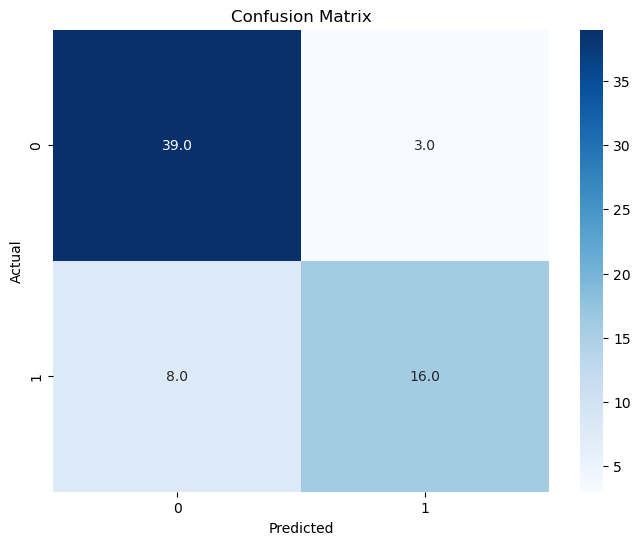

In [88]:
# logistic regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

# train model
logreg = LogisticRegression(max_iter=1000000)
logreg.fit(X_train, y_train)

y_test_pred = logreg.predict(X_test)

# evaluate performance so far...
# TODO: verify if axis labels are correct
def show_confusion_mtx(cm):
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, cmap="Blues", fmt=".1f")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.show()

cm = confusion_matrix(y_test, y_test_pred)
show_confusion_mtx(cm)